
About the dataset

* state: string. 2-letter code of the US state of customer residence
* account_length: numerical. Number of months the customer has been with the current telco provider
* area_code: string="area_code_AAA" where AAA = 3 digit area code.
* international_plan: (yes/no). The customer has international plan.
* voice_mail_plan: (yes/no). The customer has voice mail plan.
* number_vmail_messages: numerical. Number of voice-mail messages.
* total_day_minutes: numerical. Total minutes of day calls.
* total_day_calls: numerical. Total number of day calls.
* total_day_charg: numerical. Total charge of day calls.
* total_eve_minutes: numerical. Total minutes of evening calls.
* total_eve_calls: numerical. Total number of evening calls.
* total_eve_charge: numerical. Total charge of evening calls.
* total_night_minutes: numerical. Total minutes of night calls.
* total_night_calls: numerical. Total number of night calls.
* total_night_charge: numerical. Total charge of night calls.
* total_intl_minutes: numerical. Total minutes of international calls.
* total_intl_calls: numerical. Total number of international calls.
* total_intl_charge: numerical. Total charge of international calls
* number_customer_service_calls: numerical. Number of calls to customer service
* churn: (yes/no) Customer churn - target variable.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
train.select_dtypes(include = 'object').columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [6]:
train.select_dtypes(include = 'object').head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [7]:
train.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [8]:
test.area_code.unique()

array(['area_code_415', 'area_code_510', 'area_code_408'], dtype=object)

Encoding categorical variables

In [9]:
len(train.state.unique())

51

In [10]:
# extract the categorical variables
cat_var = [ feature for feature in train.columns if train[feature].dtypes=='object']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


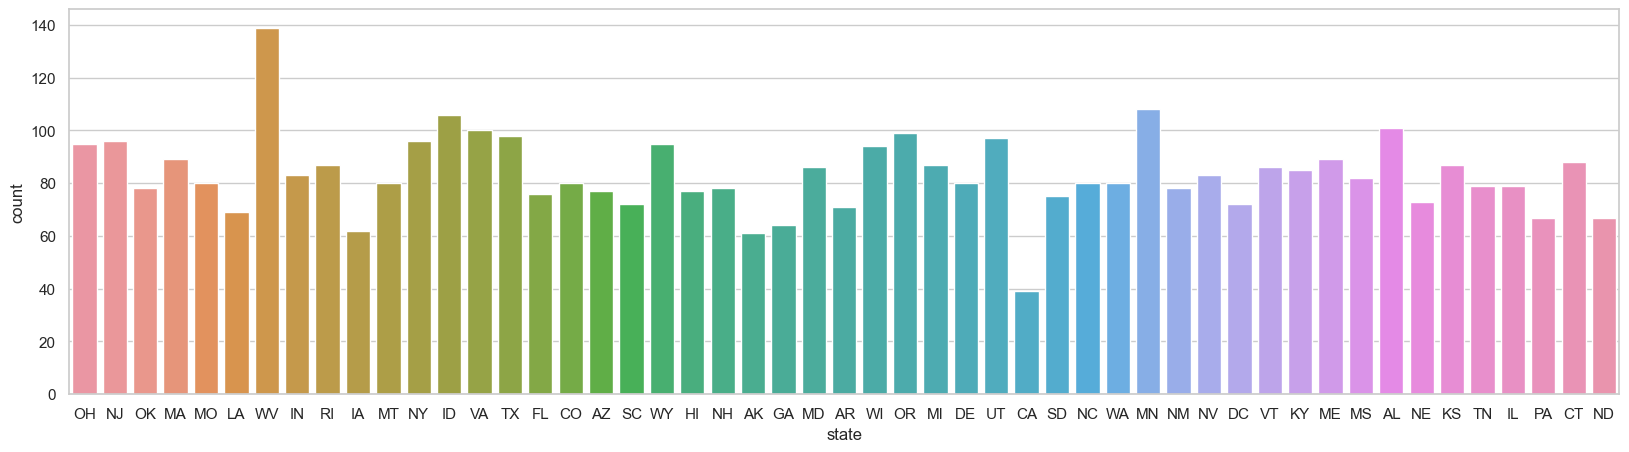

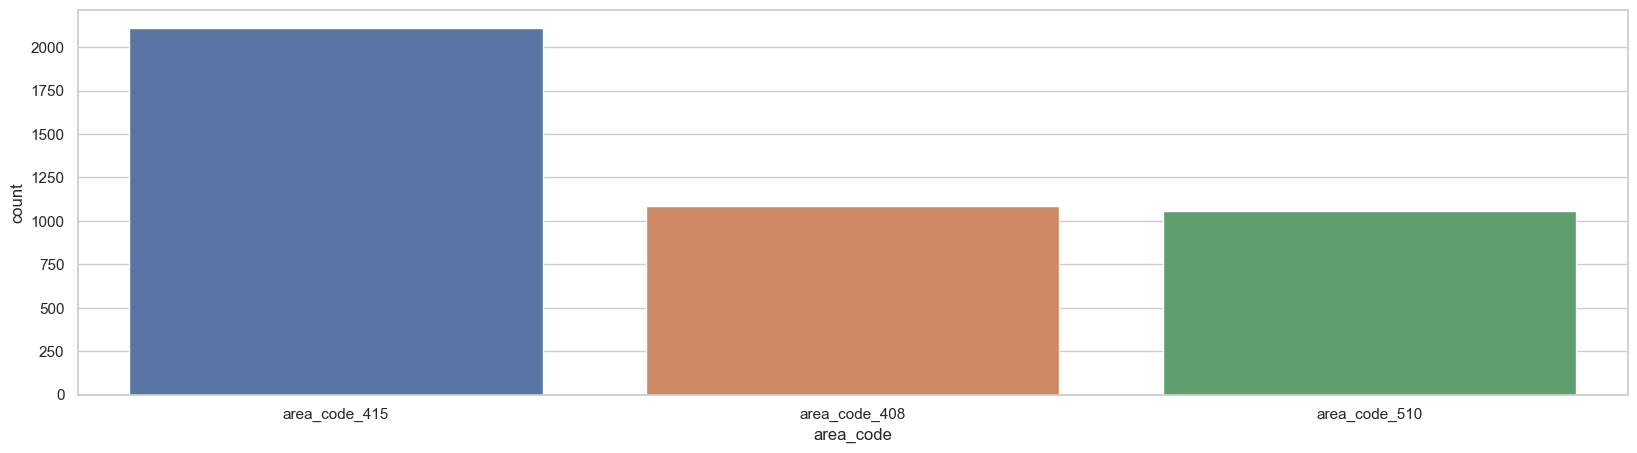

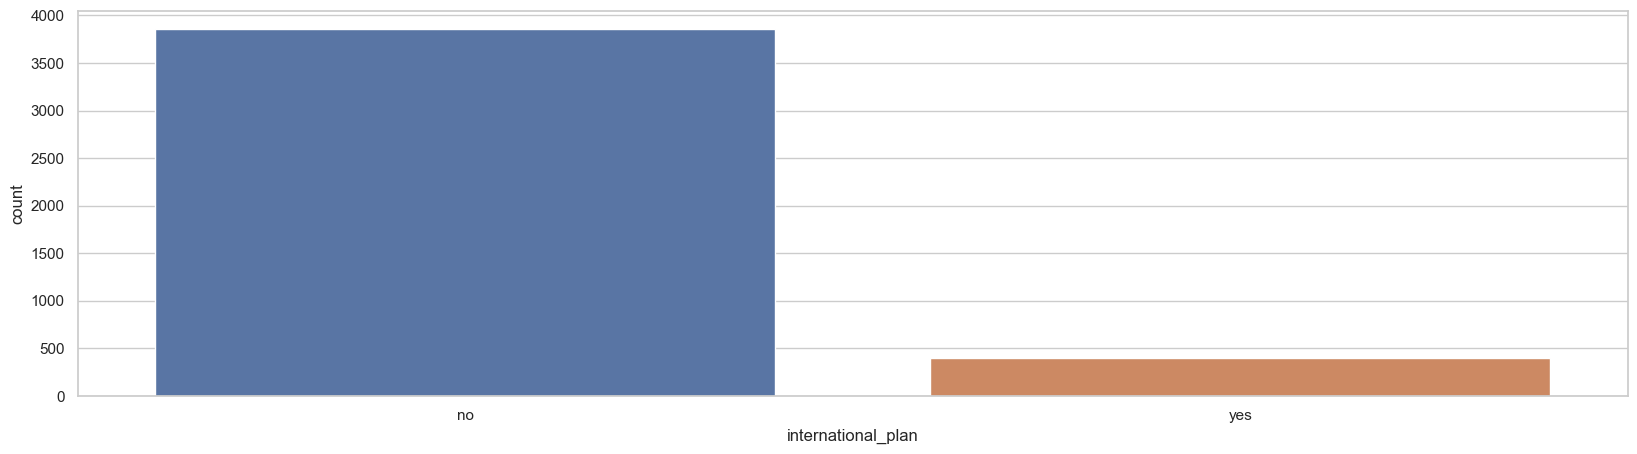

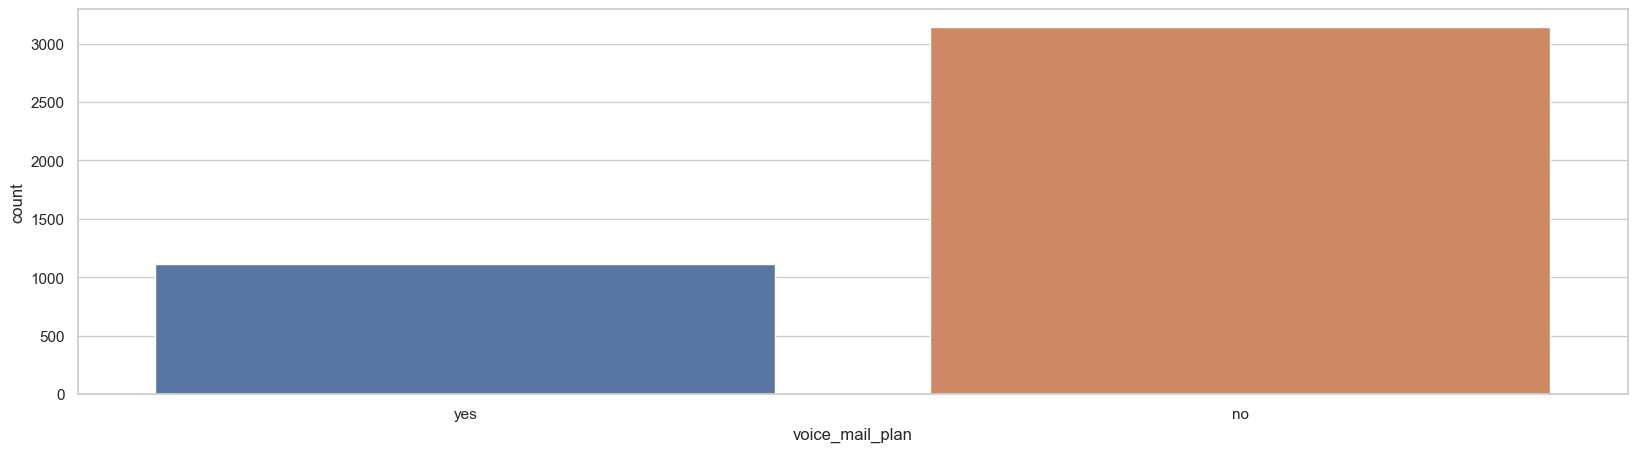

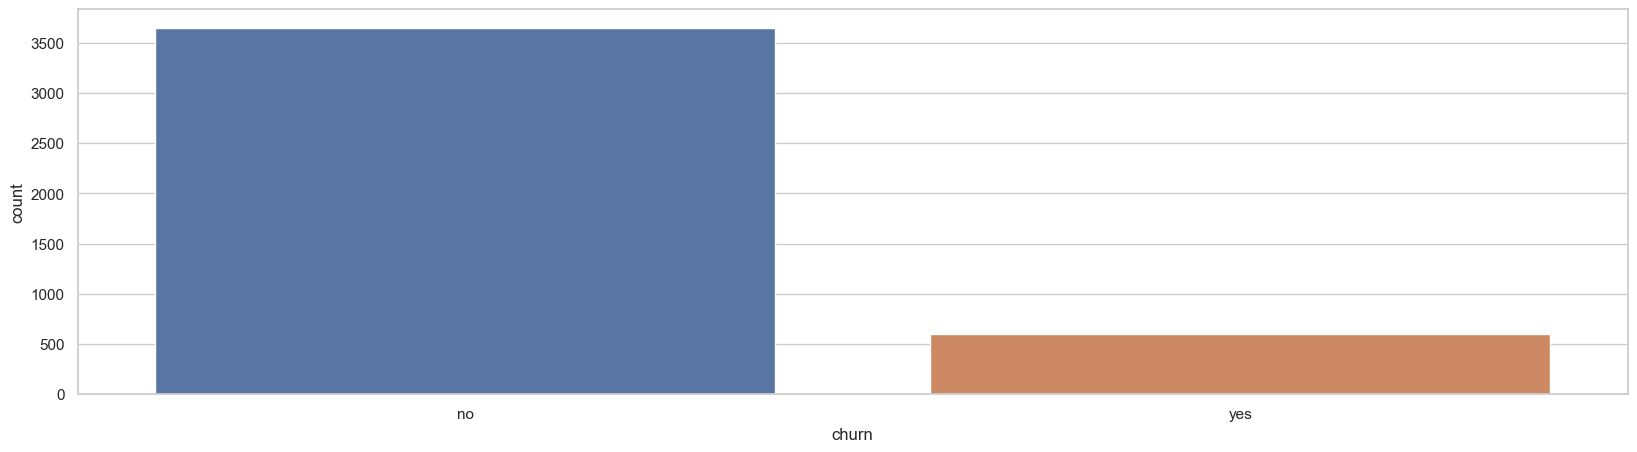

In [11]:
#display the all the categorical variable 
for i, feature in enumerate(cat_var):
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    ax = sns.countplot(x = train[feature], data = train)

In [12]:
#Extract the numerical features from the dataset
num_var = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


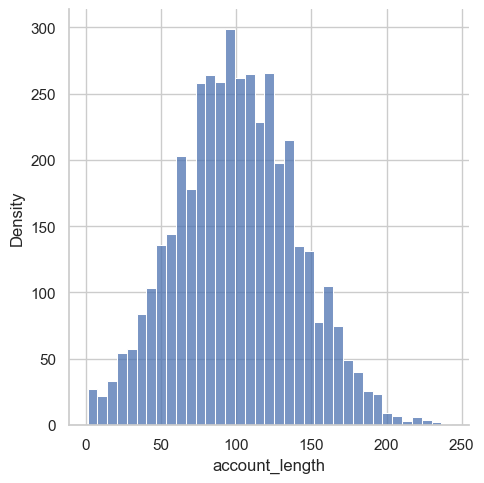

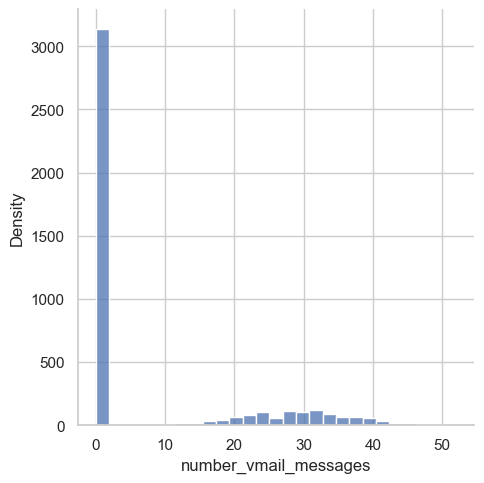

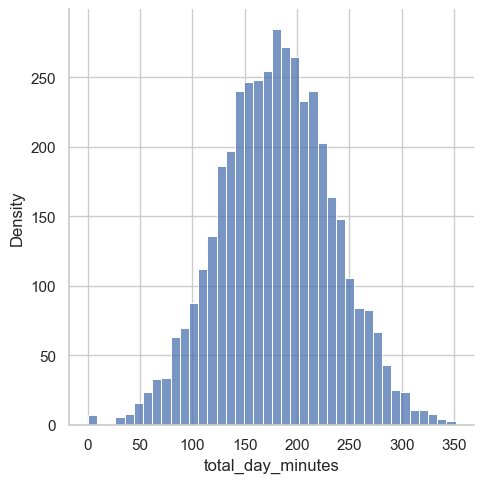

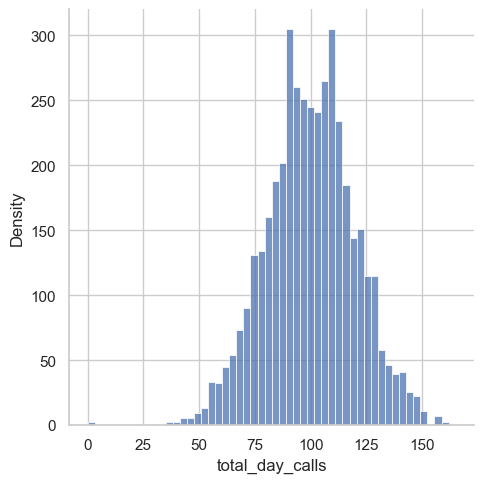

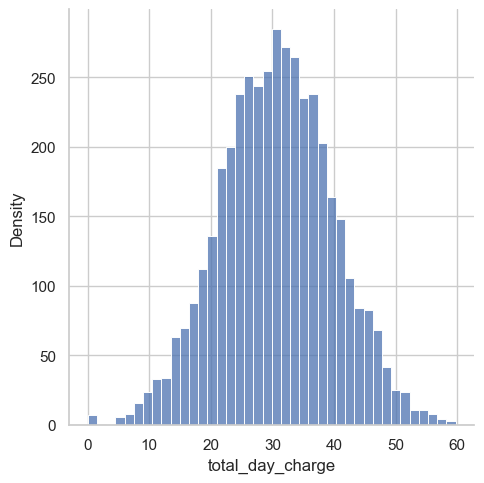

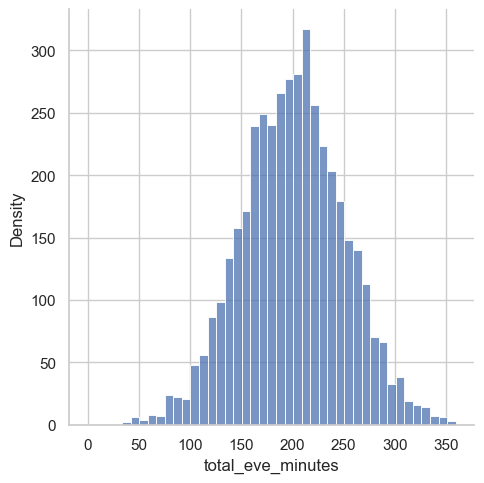

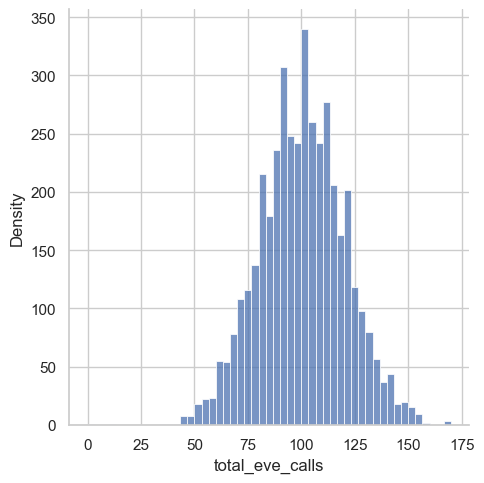

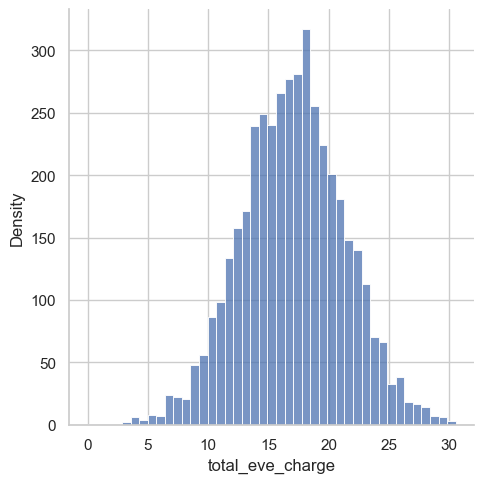

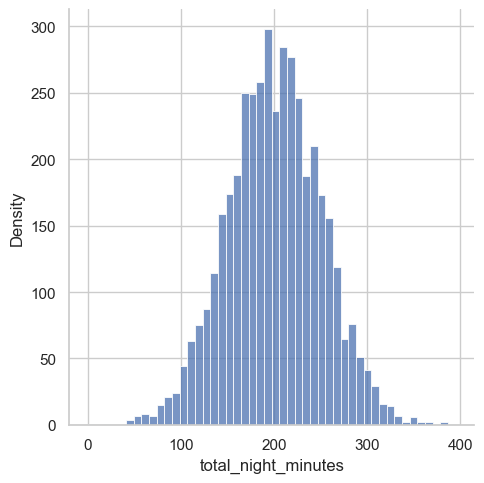

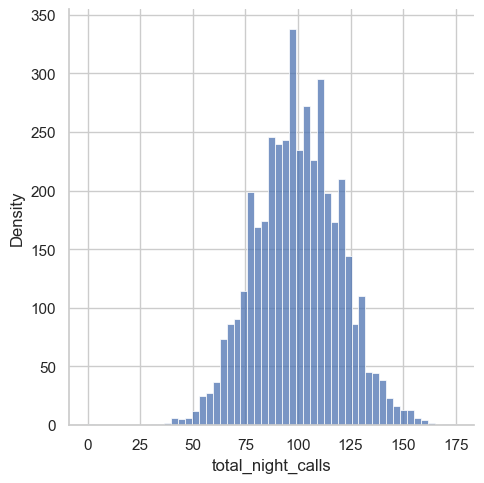

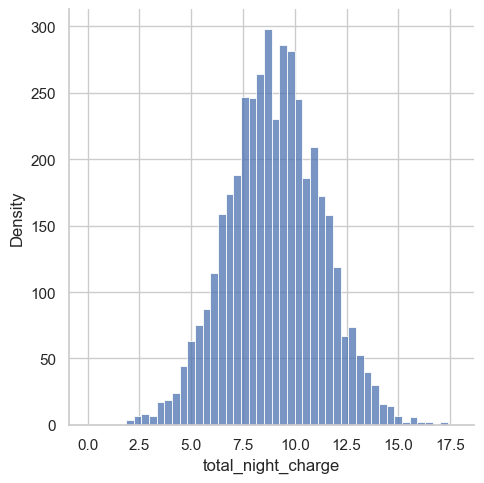

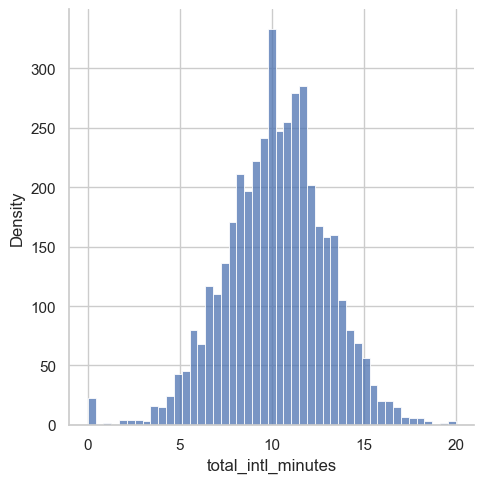

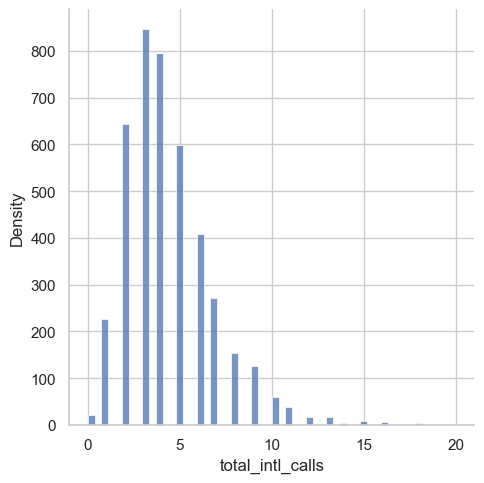

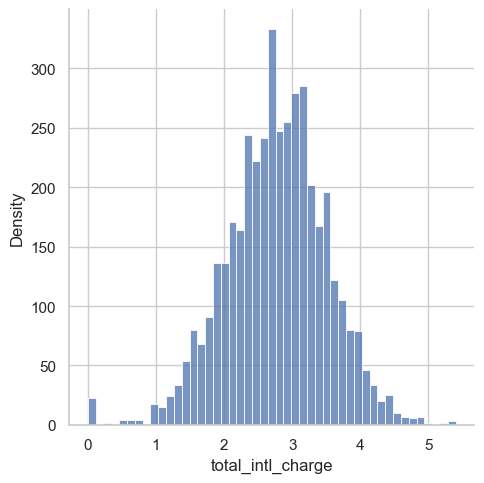

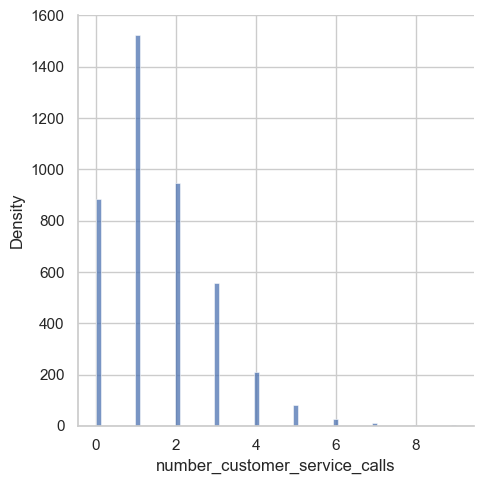

In [13]:
# Density plot of all the numerical features
n = len(num_var)
for i, feature in enumerate(num_var):
#     fig=plt.subplots(figsize=(4, 4))
    #plt.subplot(4, 2, i+1)
    #plt.subplots_adjust(hspace = 1.0)
    sns.displot(train[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

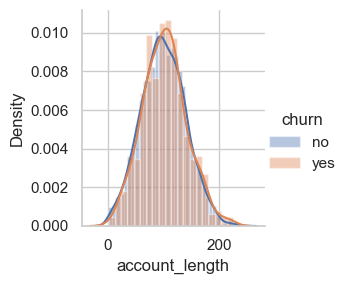

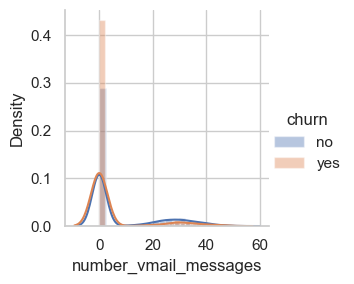

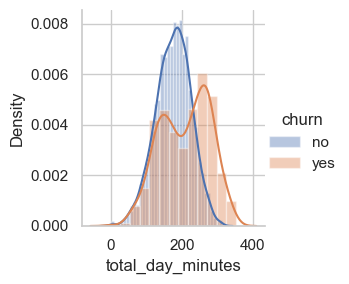

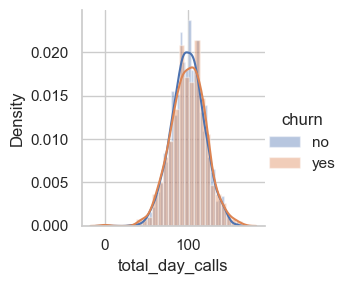

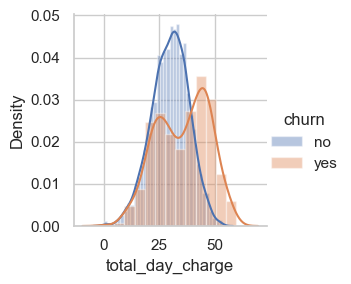

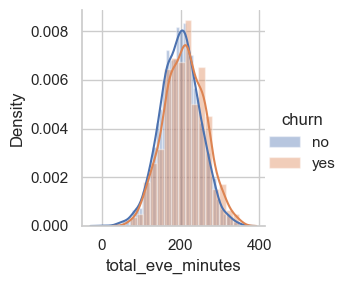

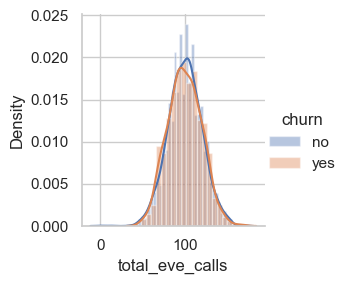

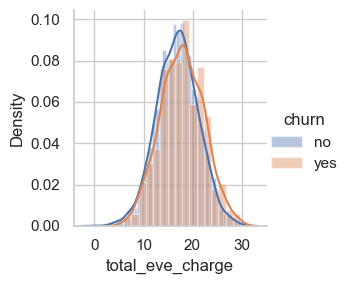

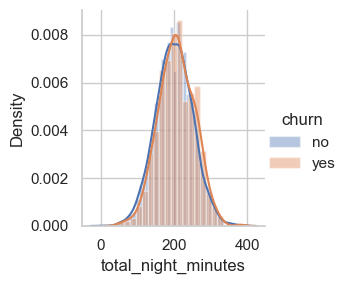

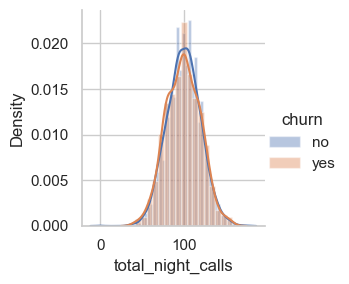

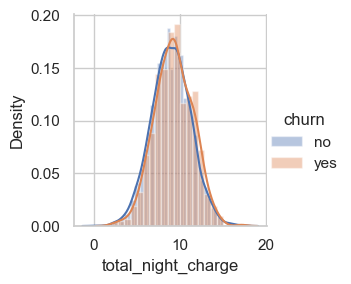

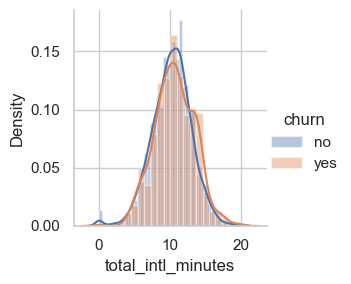

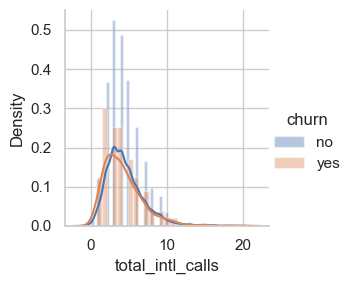

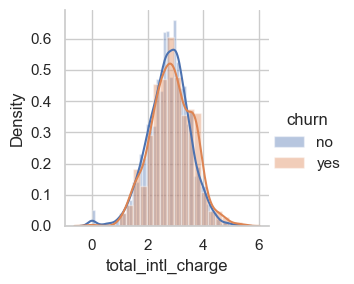

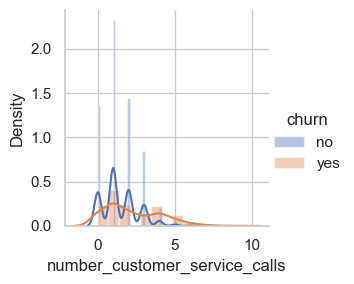

In [14]:
for i, feature in enumerate(num_var):
    #fig=plt.figure(figsize=(4, 4))
    sns.FacetGrid(train, hue='churn').map(sns.distplot, feature).add_legend()
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()
    


Hash encoding it is necessary to know about hashing. Hashing is the transformation of arbitrary size input in the form of a fixed-size value

In [15]:
#pip install --upgrade category_encoders

In [16]:
import category_encoders as ce

#Create object for hash encoder
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
test = hash_state.transform(test)
train.select_dtypes(include = 'object').head()

,area_code,international_plan,voice_mail_plan,churn
0,area_code_415,no,yes,no
1,area_code_415,no,no,no
2,area_code_408,yes,no,no
3,area_code_415,yes,no,no
4,area_code_510,no,yes,no


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[['area_code']]))
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test[['area_code']]))

# reset their indexes
OH_cols_train.index = train.index
OH_cols_test.index = test.index

# remove column 'area_code'
train = train.drop(['area_code'], axis = 1)
test = test.drop(['area_code'], axis = 1)

# concat
train = pd.concat([train, OH_cols_train], axis = 1)
test = pd.concat([test, OH_cols_test], axis = 1)

train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)

In [18]:
train.select_dtypes(include = 'object').head()

,international_plan,voice_mail_plan,churn
0,no,yes,no
1,no,no,no
2,yes,no,no
3,yes,no,no
4,no,yes,no


In [19]:
train.international_plan = train.international_plan.map({'yes':1, 'no':0})
test.international_plan = test.international_plan.map({'yes':1, 'no':0})

train.voice_mail_plan = train.voice_mail_plan.map({'yes':1, 'no':0})
test.voice_mail_plan = test.voice_mail_plan.map({'yes':1, 'no':0})

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

In [21]:
train.churn = train.churn.map({'yes':1, 'no':0})

In [22]:
type(train.columns[-1])

str

In [23]:
from sklearn.linear_model import LogisticRegression
X = train.drop(['churn'], axis = 1)
y = train['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score
# Predict the classes of the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8458823529411764


In [26]:
train.columns 

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn', '0', '1',
       '2'],
      dtype='object')

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [28]:
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)

# Predict the classes of the testing set
y_pred = LR.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7


In [29]:
from sklearn.model_selection import cross_val_score

LR_scores = cross_val_score(LR, X_test, y_test,
                              cv=5, scoring = 'accuracy')
print(LR_scores.mean())

0.8388235294117647


In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [31]:
RFC = RandomForestClassifier(random_state = 2)
forest_params = [{'max_depth': list(range(10, 15))}, {'n_estimators': list(range(100, 500, 50))}]

clf = RandomizedSearchCV(RFC, forest_params, cv = 5, scoring='accuracy')

clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

print(clf.best_score_)

{'n_estimators': 300}
0.9449147339600629


In [32]:
ADC = AdaBoostClassifier(random_state = 2)
AD_params = [{'n_estimators': list(range(100, 500, 50))}]

clf = RandomizedSearchCV(ADC, AD_params, cv = 5, scoring='accuracy')

clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

print(clf.best_score_)

{'n_estimators': 350}
0.899378216934496


In [33]:
results = { 'Model': ['LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier'],
          'Hyperparameters': ['None', 'n_estimators: 400', 'n_estimators: 350'],
          'Accuracy': [0.842, 0.945, 0.90]}
pd.DataFrame(results)

,Model,Hyperparameters,Accuracy
0,LogisticRegression,None,0.842
1,RandomForestClassifier,n_estimators: 400,0.945
2,AdaBoostClassifier,n_estimators: 350,0.900
